# Multilayer perceptron

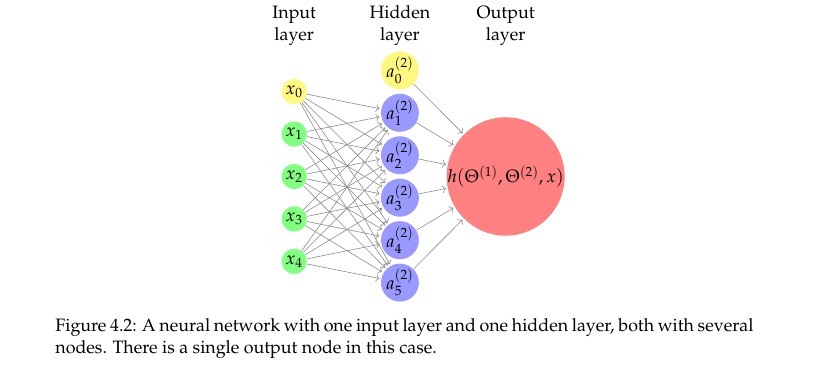

$$z_i^{(2)} = \sum_{j=0}^n x_j \theta_{ji}^{(1)} $$

En forma matricial
$z^{(2)} = x^T \Theta^{(1)} $

Hasta el momento esto es un proceso lineal. La no linealidad es necesaria como lo explico mas adelante.

La no linealidad se activa con funciones de *activacion*.

Es decir

$$ a_i^{(2)} = f(z_{i}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}}$$

Vectorialmente esto puede escribir como


$$ a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$

Vamos hacia la salida:

$$ z^{(3)} = \sum_{j=0}^{m} a_j^{(2)} \theta_j^{(2)}$$
De forma vectorial

$$ z^{(3)} = {a^{(2)}}^T \theta^{(2)}$$

Para terminar necesitamos activar esta **neurona**.

$$ h(\Theta^{(1)}, \Theta^{(2)}, x) = \frac{1}{1 + \mathrm{e}^{-z^{3}}}$$




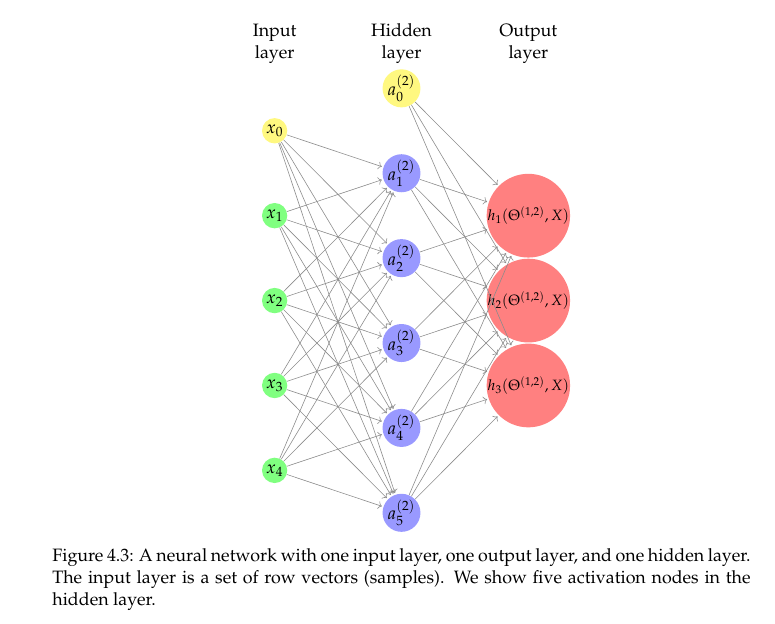

La propagacion a traves de las primeras dos capas es igual. (la entrada y la oculta) pero la salida es diferente.

$$z^{(3)} = {a^{(2)}}^T \Theta^{(2)} $$
y finalmente

$$h_i(\Theta^{(1)}, \Theta^{(2)}, x) = \frac{1}{1 + \mathrm{e}^{-z_i^{(3)}}} $$

Al final escogemos la de mayor probabilidad

$$ h(\Theta^{(1)}, \Theta^{(2)}, x) = \max_{i=1,2,3} h_i( \Theta^{(1)}, \Theta^{(2)}, x) $$

## Arquitectura de redes:
Que define una arquitectura de redes.
La definen los siguientes *hiperparametros*
(parametros son los $\Theta^{(i)}$. )

* Numero de capas
* Numero de nodos por capa
* Funciones de activacion
* Funciones de costo
* Optimizacion: Aceleradores de gradiente (Momento, Nesterov, Adam, Adagrad, Adadelta, RMS, etc.)
, batch size, learning rate $\eta$, si el gradiente es steepest descent, CG u otro (este es el caso de este curso).

* Metricas de error (precision, accuracy, recall, F1, etc)

Tambien agregamos a la definicion de una arquitectura, como se conectan los nodos entre si.

* Densamente conectados. Todos con todos. El case del MLP
* Parcialmente conectados. convnets, CNN: Convolutional Neural Networks. 
* Recurrent Neural Networks (RNN). La salida de una capa retroalimenta la entrada (hablaremos mas tarde en el curso de esta arquitectura).
* GAN: Generative Adversarial Networks: Son dos redes compitiendo entre si (el detective y el falsificador).


Como construir una arquitectura.
* La experiencia
* Se pueden usar maquinas automaticas. 
[AutoML: Automatic ML](https://cloud.google.com/automl)


Un enlace importante para entender los hiperparametros de una red neuronal (arquitectura)

[PlayGround](https://playground.tensorflow.org/)




## Funciones de Activacion:
La idea es romper la linealidad. Por que? pues muchos problemas en la practica no son lineales.

Si nosotros ignoraramos las activaciones,
tendriamos modelos como

* primera capa
$$ x^T \Theta^{(1)}$$
Esto es un vector fila. Por que ? $x \in \mathbb{R}^n$, $\Theta^{(1)} \in \mathbb{R}^{n \times p}$. $x^T \in \mathbb{R}^{1 \times n}$ (vector fila). Y el producto esta en $\mathbb{R}^{1 \times p}$. Es un vector fila. Vamos a transponerlo para que sea un vector columna.
La primera capa seria (como vector columna)

$$ (\Theta^{(1)})^T x  $$
* segunda capa

$$(\Theta^{(2)})^T ( \Theta^{(1)})^T x $$

y asi sucesivamente, la capa $L-1$

$$h(\Theta, x) = \prod_{\ell=0}^{L-1} ( \Theta ^{L-\ell})^T x$$

Esto sigue siendo un problema lineal en 
$x$, es decir $h(\Theta, \alpha x + \beta y)= \alpha h(\Theta, x) + \beta h(\Theta, y) $

Esto simula una regresion lineal.  Es decir, uno puede usar redes neuronales con activaciones la identidad $I(x)=x$ para simular regresiones lineales.

El mundo no es lineal y por ejemplo si quisieramos escoger entre dos objetos: blanco y negro, demos elegir una funcion de activacion,
como por ejemplo:

\begin{eqnarray}
a(t) = \left \{ 
    \begin{array}{cc}
    1 & \text{si  }   t > 0  \\
    0 & \text{si  }  t \le 0 
    \end{array}
    \right .
\end{eqnarray}

En este ejemplo  justifica la introduccion de funciones de activacion.












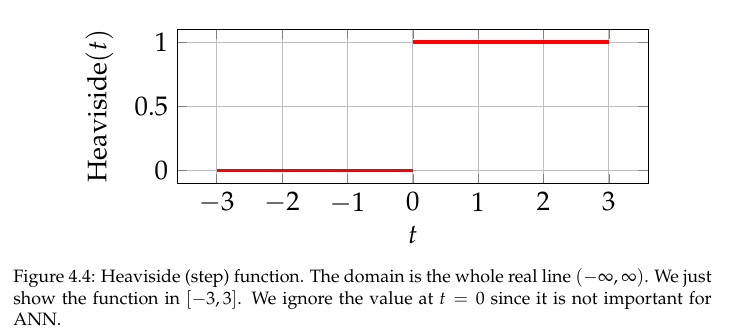

Que problema tiene esta funcion de activacion.
Grave: Que el gradiente es 0 en todas partes menos cuanto $t=0$ (que no existe).

Que el gradiente sea cero es grave.

$\theta^{(i+1)}= \theta^{i} - \eta \nabla_{\theta}(\theta^{(i)})$. 

Que el gradiente sea 0 muy cercano a cero es un problema que se llama el 
*vanishing gradient problem*

### Logistic

$$\sigma(t) = \frac{1}{1 + \mathrm{e}^{-t}} $$

Tambien sufre del problema de "vanishing gradient" (por que?)

Pues, $\sigma'(t)=\sigma(t) (1 - \sigma(t))$
cuando $t << 0$ entonces  $\sigma(t) \approx 0$.
Si $t \gg 0 $, entonces $1- \sigma(t) \approx 0$.
De forma que $\sigma'(t) \approx 0$ para $|t| \gg 0$.
Este es un sintoma de "vanishing gradient problem".





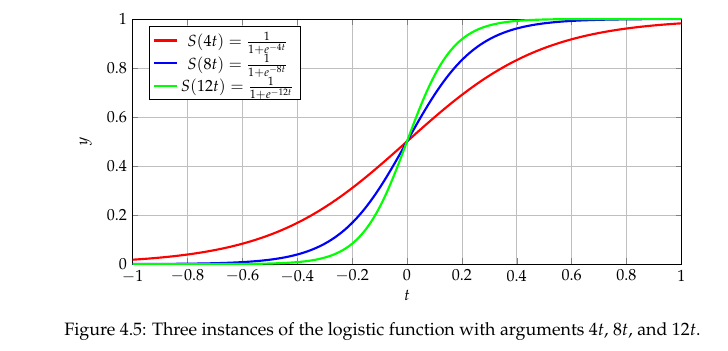

### Tangente hiperbolica 

$a(t) = \tanh(t) = \frac{\mathrm{e}^t-\mathrm{e}^{-t}}{\mathrm{e}^t + \mathrm{e}^{-t}}$

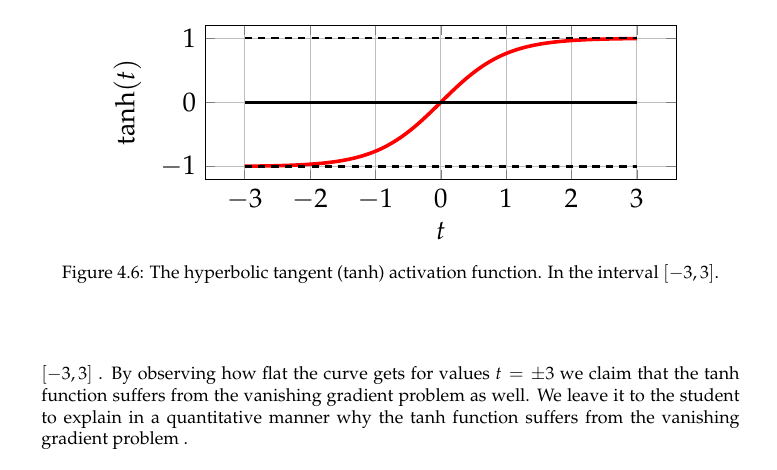

de la grafica se ve que la tanh tiene derivada casi 0 en -3, 3, y valores mayores (en valor absoluto).
Es decir tambien sufre el *vansihg gradient*.

Se deja de tarea sustentar este criterio.

Aparece la

## ReLU: Rectified Linear Unit.


\begin{eqnarray} ReLU(t) = \max \{ t, 0 \} = \left \{
    \begin{array}{cc}
    0 & \text{si } t < 0 \\
    t & \text{ si } t \ge 0 
    \end{array}
    \right . 
     \end{eqnarray}

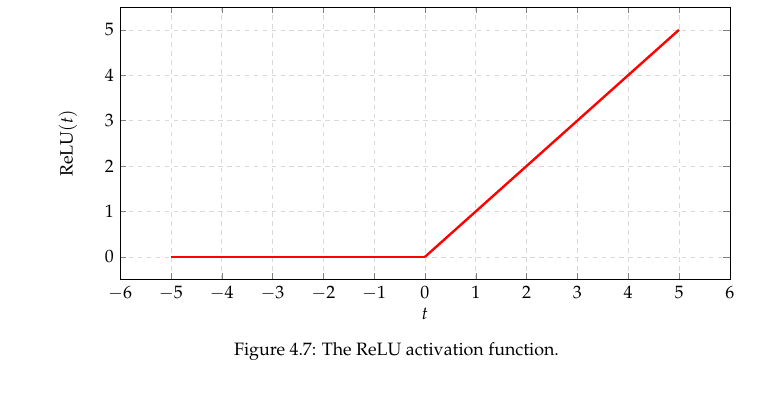

En la parte positiva el gradiente es 1. No hay problema. En parte negativa el gradiente es 0 podria generar problemas. A este problema se le concoce como
[Dying ReLU neuron](https://towardsdatascience.com/the-dying-relu-problem-clearly-explained-42d0c54e0d24#4995)


Aparece como alternativa para el dying ReLU el 

### Leaky ReLU.

\begin{eqnarray}
\text{Leaky ReLU}(t) = \left \{
    \begin{array}{cc}
    at & \text{si  } t < 0 \\
    t & \text{ si  } t \ge 0 
    \end{array}
    \right . 
\end{eqnarray}
$a$ es positivo pero pequeno. 
Pregunta, por que $a$ pequeno.



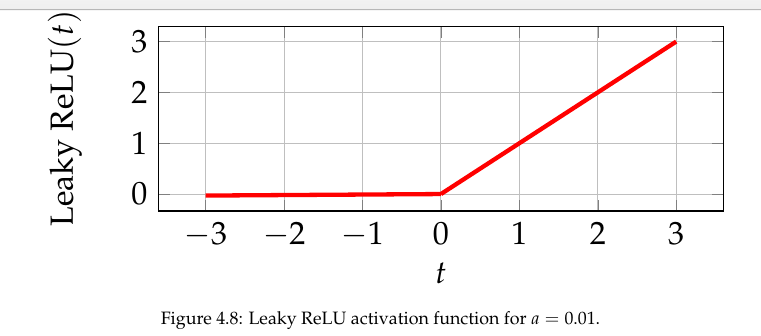

Ni la Heaviside, ni la ReLU, ni la Leaky ReLU son diferenciables en 0. Entonces se buscaba algo que fuera diferenciable en todas partes pero que fuera simiar a la leaky ReLU.

Aparace entonces las 

### ELU: Exponential Linear Unit

\begin{eqnarray}
\text{ELU}(t) = \left \{
    \begin{array}{cc}
    \alpha( \mathrm{e}^t -1)  & \text{si  } t < 0 \\
    t & \text{ si  } t \ge 0 
    \end{array}
    \right . 
\end{eqnarray}

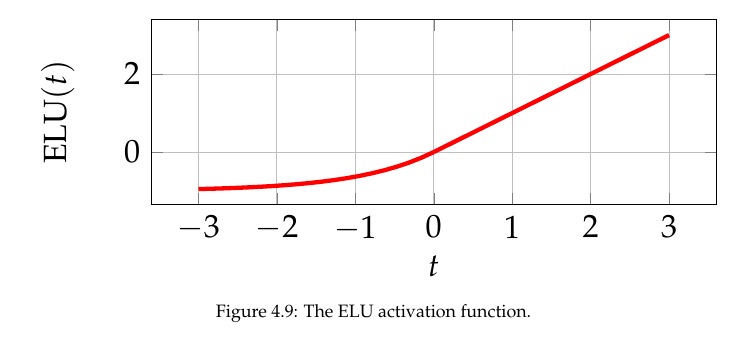

si $\alpha=1$, la pendiente es 1. Y la funcion es diferenciable en 0.

Por ultimo necesitamos una funcion de activacion que clasifique objetos en multiclase: perros, gatos, elefantes, etc

Esta es la

### Softmax:

$$\text{Softmax}(z_i) = \frac{\mathrm{e}^{z_i}}{\sum_{j=1}^K \mathrm{e}^{z_j}}  \quad, i=1,2, \cdots, K.$$ $k$ es el numero de clases.

Hay muchas mas. Por ejemplo el paquete

[Keras](https://keras.io/api/layers/activations/#layer-activation-functions)
ofrece una cantidad mayor que la aca mostramos de funciones de activacion y permite disenar nuevas al ajuste de usuario (custom).

Aparte del problema de "vanishing gradient" existe el de "exploding gradient" (el gradiente crece sin limites) este problema lo discutimos mas adelante. 

## Propagacion Hacia Adelante
En el momento las redes neuronales que hemos estudiado son "fully connected" (densas).
Vamos a estudiar unos pequenos trucos matematicos para simplificar la propagacion hacia adelante y hacia atras.

La operacion entre una capa y la siguiente antes de aplicar la activacion es una operacion lineal (affine transformation).

$$A x + b \quad (1) $$
$x$ es el vector de $\theta$s y $b$ es el "bias" (sesgo).

Queremos integrar esta operacion en una simple multiplicacion de una  matriz por un vector.
$A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$,
$x \in \mathbb{R}^n$.  Podemos escribir el sistema (1). De la siguiente forma


\begin{eqnarray}
\begin{pmatrix}
b_1 & a_{11} & a_{12} &\cdots & a_{1n} \\
b_2 & a_{21} & a_{22} & \cdots & a_{12n} \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
b_m & a_{m1} & a_{m2}  & \cdots & a_{mn} \\
\end{pmatrix}
\begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_n
\end{pmatrix}
\end{eqnarray}

Si, en vez de $Ax+b$ queremos la formula $x^T \Theta + b$ entonces

\begin{eqnarray}
\begin{pmatrix} 1 & x_1 & x_2 & \cdots & x_n
\end{pmatrix}
\begin{pmatrix} b_1 & b_2 & \cdots & b_m \\
\theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
\theta_{n1} & \theta_{n2} & \cdots & \theta_{nm}
\end{pmatrix}
\end{eqnarray}

Con el fin de simplificar podemos llamar a los 
$b_i = \theta_{0i}$ y escribir:

\begin{eqnarray}
\begin{pmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1m} \\
\end{pmatrix}
\begin{pmatrix} \theta_{01} & \theta_{02} & \cdots & \theta_{0m} \\
\theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
\theta_{n1} & \theta_{n2} & \cdots & \theta_{nm}
\end{pmatrix}
\end{eqnarray}

En vez de tener un vector de entrada $x$ podemos tener $m$ vectores de entrada formando un matriz de $m \times n$.




\begin{eqnarray}
\begin{pmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn} \\
\end{pmatrix}
\begin{pmatrix} \theta_{01} & \theta_{02} & \cdots & \theta_{0m} \\
\theta_{11} & \theta_{12} & \cdots & \theta_{1m} \\
\vdots & \vdots & \ddots & \vdots \\
\theta_{n1} & \theta_{n2} & \cdots & \theta_{nm}
\end{pmatrix}
\end{eqnarray}

Estamos listos para formular el algoritmo de propagacion hacia adelante.

* Comence con los datos de  entrada $X$. Aca $X \in \mathbb{R}^{m \times n}$. Donde $m$ es el numero de muestras y $n$ el numero de "features" (atributos).

* La conexion entre la primera y la segunda capa esta dada por

$$Z^{(2)} = X \Theta^{(1)} $$
Puede suceder que $\Theta^{(1)}$ sea un vector fila (cuando la llegada es un solo elemento).

Si lo queremos columna (como discutimos arriba).
$$Z^{(1)}=(\Theta^{(1)})^T X $$ este si es columna.

* Aplicamos la activacion

$$A^{(1)}= f(Z^{(1)}) $$
Esto se repite para todas la capas subsiguientes.


Y llegamos a la ultima capa $L$

$$ A^{(L)} = h(\theta, X) = f(Z^{(L)})  $$

Con esto queda explicado el algoritmo de
propagacion hacia adelante. 

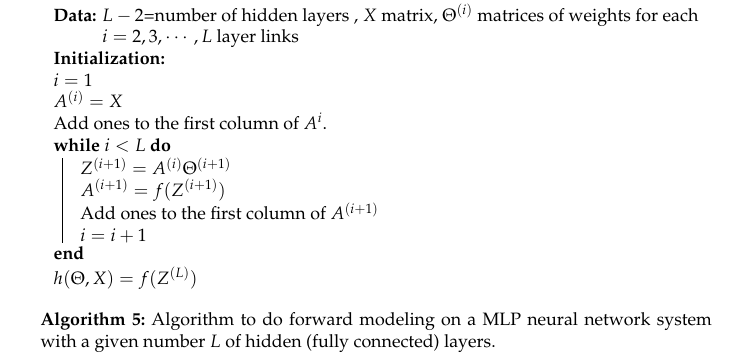